### Zadanie 9_1

Do wykonania zadań niezbędne będzie pobranie bazy filmów oraz bazy gatunków:

Baza filmów

Baza gatunków

Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [657]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar as cal

%matplotlib inline

##### Wczytywanie danych

In [658]:

df_genres = pd.read_csv('tmdb_genres.csv')
df_genres

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


In [659]:
df_genres.rename(columns={'Unnamed: 0':'genre_id'},inplace=True)
df_genres.columns

Index(['genre_id', 'genres'], dtype='object')

In [660]:
df_movies = pd.read_csv('tmdb_movies.csv')
df_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [661]:

df_movies.columns

Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'genre_id'],
      dtype='object')

##### łaczenie tabel

In [662]:
df_movie_2 = pd.merge(df_movies,df_genres,how='inner',on='genre_id')
df_movie_2

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


##### 1 Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [663]:
df_movie_2[df_movie_2['vote_count']>df_movie_2['vote_count'].quantile(0.75)].sort_values('vote_average',ascending=False).head(10)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0,Drama
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0,Drama
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0,Drama
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0,Thriller
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0,Drama
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0,Drama
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0,Drama
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0,Fantasy
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0,Drama
3719,3719,3000000,NaN,510,en,One Flew Over the Cuckoo's Nest,While serving time for insanity at a state men...,127.525581,1975-11-18,108981275,133.0,Released,"If he's crazy, what does that make you?",One Flew Over the Cuckoo's Nest,8.2,2919,18.0,Drama


##### 2 Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [664]:

df_movie_2['release_date'] = df_movie_2['release_date'].str.strip()    
df_movie_2['release_date'] = df_movie_2['release_date'].replace(r'^\s*$', np.nan, regex=True)


In [665]:

df_movie_2['release_date_2'] =pd.to_datetime(df_movie_2['release_date'],errors='coerce')
df_movie_2['release_year'] = df_movie_2['release_date_2'].dt.strftime('%Y')
df_movie_2.head()


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres,release_date_2,release_year
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action,2009-12-10,2009
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure,2007-05-19,2007
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action,2015-10-26,2015
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action,2012-07-16,2012
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action,2012-03-07,2012


In [666]:
df_movie_2.dtypes

Unnamed: 0                    int64
budget                        int64
homepage                     object
id                            int64
original_language            object
original_title               object
overview                     object
popularity                  float64
release_date                 object
revenue                       int64
runtime                     float64
status                       object
tagline                      object
title                        object
vote_average                float64
vote_count                    int64
genre_id                    float64
genres                       object
release_date_2       datetime64[ns]
release_year                 object
dtype: object

In [667]:
df_movie_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4803 non-null   int64         
 1   budget             4803 non-null   int64         
 2   homepage           1712 non-null   object        
 3   id                 4803 non-null   int64         
 4   original_language  4803 non-null   object        
 5   original_title     4803 non-null   object        
 6   overview           4800 non-null   object        
 7   popularity         4803 non-null   float64       
 8   release_date       4802 non-null   object        
 9   revenue            4803 non-null   int64         
 10  runtime            4801 non-null   float64       
 11  status             4803 non-null   object        
 12  tagline            3959 non-null   object        
 13  title              4803 non-null   object        
 14  vote_ave

In [668]:
df_movie_2=df_movie_2[df_movie_2['release_year'].notnull()]

In [669]:
df_movie_2['release_year'] = df_movie_2['release_year'].astype('int')
#df_movie_2
df_movie_2.info()
#df_movie_2.to_excel("df_movie_2.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4802 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4802 non-null   int64         
 1   budget             4802 non-null   int64         
 2   homepage           1712 non-null   object        
 3   id                 4802 non-null   int64         
 4   original_language  4802 non-null   object        
 5   original_title     4802 non-null   object        
 6   overview           4799 non-null   object        
 7   popularity         4802 non-null   float64       
 8   release_date       4802 non-null   object        
 9   revenue            4802 non-null   int64         
 10  runtime            4800 non-null   float64       
 11  status             4802 non-null   object        
 12  tagline            3959 non-null   object        
 13  title              4802 non-null   object        
 14  vote_average 

C:\Users\monas\AppData\Local\Temp\ipykernel_30652\3230159126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_2['release_year'] = df_movie_2['release_year'].astype('int')


In [670]:
df_movie_3 = df_movie_2[(df_movie_2['release_year']>=2010) & (df_movie_2['release_year']<=2016)]
df_movie_3.head()


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres,release_date_2,release_year
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action,2015-10-26,2015
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action,2012-07-16,2012
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action,2012-03-07,2012
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010-11-24,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0,Animation,2010-11-24,2010
7,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,Action,2015-04-22,2015


In [671]:
result = df_movie_3.groupby('release_year')[['revenue','budget']].mean()
#result['budget'].values
result.index
result

,revenue,budget
release_year,,
2010,9.043811e+07,3.449541e+07
2011,9.200413e+07,3.477232e+07
2012,1.160659e+08,3.492203e+07
2013,1.013485e+08,3.552329e+07
2014,1.013466e+08,3.095989e+07
2015,1.054399e+08,3.113216e+07
2016,1.390496e+08,4.570327e+07


In [672]:
# Funkcja formatująca – np. 1 000 000 → '1M'
def million(x, pos):
    return f'{int(x / 1_000_000)}M'

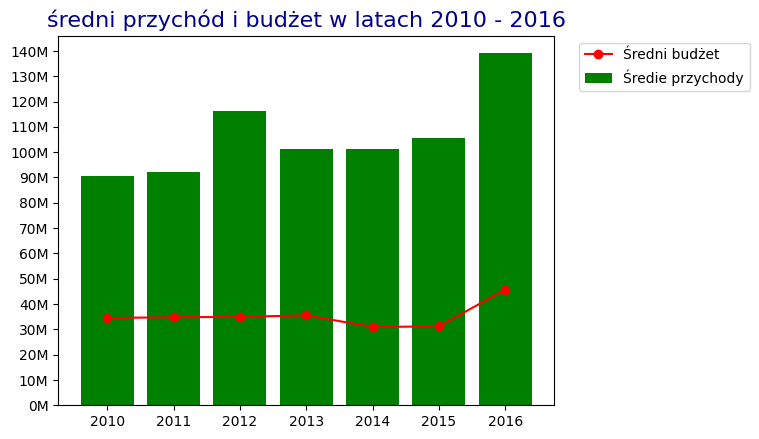

In [673]:
fig, ax = plt.subplots()

years = result.index
money1 = result['revenue'].values
money2 = result['budget'].values



formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(plt.MultipleLocator(10e6))

ax.bar(years, money1,color='green', label='Średie przychody')

ax.plot(years, money2,color='red', marker='o', label='Średni budżet')

ax.legend(loc=(1.05,0.85))
text = "średni przychód i budżet w latach 2010 - 2016"
ax.set_title(text, fontsize=16, color='darkblue')


plt.show()

##### 3 Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu

##### połaczenie tabel zrobione na początku zadania

###### 4 Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [674]:
df_movie_3.columns

Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'genre_id', 'genres', 'release_date_2', 'release_year'],
      dtype='object')

In [675]:
df_movie_3.rename(columns={'Unnamed: 0': 'pos'},inplace = True)

C:\Users\monas\AppData\Local\Temp\ipykernel_30652\1739810588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_3.rename(columns={'Unnamed: 0': 'pos'},inplace = True)


In [676]:
df_movie_3.head(2)

,pos,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres,release_date_2,release_year
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action,2015-10-26,2015
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action,2012-07-16,2012


In [677]:
result2 = df_movie_3.groupby('genres').size().sort_values(ascending=False)
result2

genres
Drama              337
Comedy             264
Action             224
Thriller           105
Horror             102
Adventure           73
Crime               55
Animation           49
Romance             40
Science Fiction     37
Documentary         37
Fantasy             31
Family              26
Mystery             12
Music                9
History              9
War                  9
Western              5
TV Movie             3
Foreign              1
dtype: int64

##### 5 Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [678]:
result3=df_movie_3.groupby('genres')['runtime'].mean().sort_values(ascending=False)
result3

genres
History            122.222222
TV Movie           118.333333
Crime              112.581818
Adventure          112.013699
Western            111.600000
Drama              110.738095
Action             110.625000
War                110.000000
Science Fiction    108.729730
Romance            105.325000
Fantasy            104.806452
Thriller           102.047619
Comedy             100.780303
Mystery             97.833333
Music               93.555556
Animation           93.000000
Documentary         89.055556
Horror              88.843137
Foreign             86.000000
Family              84.384615
Name: runtime, dtype: float64

Najdłuższymi filmami, są filmy historyczne sredni czas trwania 122min

##### 6 Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<Axes: >

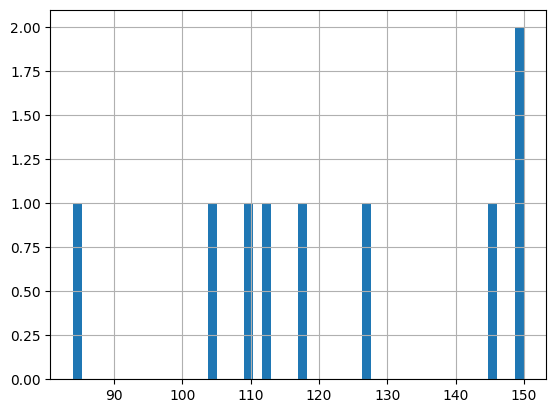

In [679]:
# Filtrowanie wierszy, gdzie gatunk jest History

a = df_movie_3[(df_movie_3['genres'] == 'History') ]
a
# Histogram tylko dla kolumny runtime
a['runtime'].hist(bins=50)